In [1]:
# All libraries required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [2]:
# Load in the data
files = ['opel_corsa_01.csv', 'opel_corsa_02.csv', 'peugeot_207_01.csv', 'peugeot_207_02.csv']

all_data = pd.DataFrame()
for file in files:
    # Read in each file
    car_data = pd.read_csv("./resources/"+file, sep=";")

    # Remove unrelated columns
    car_data = car_data.drop(columns=['Unnamed: 0'])

    # Concatenate the data together
    all_data = pd.concat([all_data, car_data], ignore_index=True, sort=False)

all_data

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.810000,24.0,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.650000,22.0,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.850000,21.0,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.210000,20.0,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.910000,21.0,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23770,1.000000,28.799999,28.559999,57.190571,3.600000,-0.0292,25.882353,81.0,115.0,1755.5,20.469999,25.0,-0.1661,14.578003,SmoothCondition,LowCongestionCondition,EvenPaceStyle
23771,1.699997,30.599998,28.529999,57.010266,1.799999,-0.0304,11.764706,81.0,106.0,736.5,17.740000,25.0,-0.1987,14.585642,SmoothCondition,LowCongestionCondition,EvenPaceStyle
23772,1.800003,29.699999,28.499999,56.883045,-0.900000,-0.1684,98.039215,81.0,106.0,1254.0,9.520000,24.0,-0.1156,14.547294,SmoothCondition,LowCongestionCondition,EvenPaceStyle
23773,2.100006,29.699999,28.409999,56.160910,0.000000,-0.0644,79.607841,80.0,112.0,1254.0,14.910000,23.0,-0.0760,14.546828,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [3]:
# Determine X (input) and y (output) - y in this case, will be drivingStyle

# Drop any values that have NaN
all_data = all_data.dropna()

x_data = all_data.copy().drop(columns=['roadSurface', 'traffic', 'drivingStyle'])
y_data = all_data[['drivingStyle']]
print(x_data.head())
print(y_data.head())

   AltitudeVariation  VehicleSpeedInstantaneous  VehicleSpeedAverage  \
0          -2.299988                  25.670519            13.223501   
1          -2.099976                  24.094259            13.638919   
2          -1.500000                  22.743179            14.031043   
3           0.100037                  22.292820            14.171073   
4           0.099976                  23.643900            14.328954   

   VehicleSpeedVariance  VehicleSpeedVariation  LongitudinalAcceleration  \
0            121.592690              -2.476980                    0.3555   
1            120.422571              -1.576260                    0.4492   
2            118.456769              -1.351080                    0.4258   
3            117.571308              -0.450359                    0.4140   
4            117.074149               1.351080                    0.3945   

   EngineLoad  EngineCoolantTemperature  ManifoldAbsolutePressure  EngineRPM  \
0    4.705883                 

In [4]:
# Pre-processing

# Normalise values
x_data = x_data.to_numpy()
x_data = preprocessing.normalize(x_data)

# Label Encoder
le_driving_style = preprocessing.LabelEncoder()
le_driving_style.fit(y_data)
y_data = le_driving_style.transform(y_data)
y_data

c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1, 1, 1, ..., 1, 1, 1])

In [5]:
# Split into different data sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data)
X_train

array([[ 0.00011391,  0.        ,  0.02696321, ...,  0.02050434,
         0.00030996,  0.01514114],
       [ 0.00249008,  0.01415414,  0.02526122, ...,  0.04586991,
        -0.00177962,  0.01693896],
       [ 0.00034819,  0.0435231 ,  0.04217678, ...,  0.01740924,
        -0.0002693 ,  0.00412895],
       ...,
       [ 0.00076335,  0.04422651,  0.048184  , ...,  0.01669825,
        -0.00026426,  0.00559409],
       [-0.00107211,  0.01715379,  0.0137409 , ...,  0.02739842,
         0.00065363,  0.01758682],
       [-0.0007094 ,  0.02316242,  0.01545049, ...,  0.01064088,
         0.00036019,  0.00749954]])

----
# Algorithm 1: Logistic Regression

In [6]:
# Libraries
from sklearn.linear_model import LogisticRegression

In [7]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [8]:
model_logistic.score(X_test, y_test)

0.8811647870728834

In [9]:
y_logis_pred = model_logistic.predict(X_test)
y_logis_pred

array([1, 1, 1, ..., 1, 1, 1])

In [10]:
y_logis_predprob = model_logistic.predict_proba(X_test)
y_logis_predprob

array([[0.06293237, 0.93706763],
       [0.20868127, 0.79131873],
       [0.06918236, 0.93081764],
       ...,
       [0.19198798, 0.80801202],
       [0.18251213, 0.81748787],
       [0.10107436, 0.89892564]])

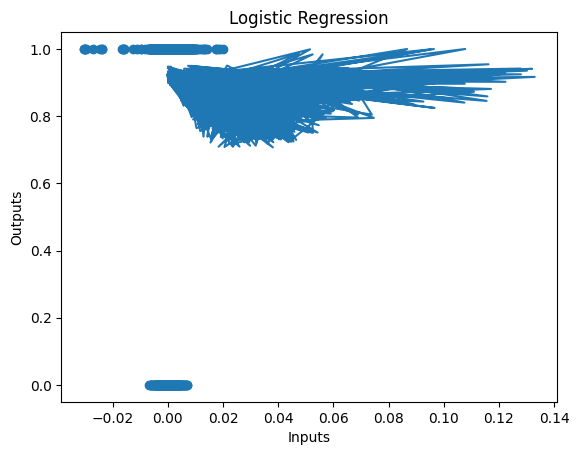

In [11]:
plt.scatter(x_data[:,0], y_data)
axes = plt.gca()
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('Logistic Regression')

plt.plot(X_test[:,2], y_logis_predprob[:,1])

Output predicted is mostly 1s due to input.

---
# Algorithm 2: k-Nearest Neighbours

In [12]:
# Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

## Method 1: No kFold

In [13]:
model_knn = make_pipeline(
    preprocessing.StandardScaler(),
    KNeighborsClassifier(n_neighbors=9)
)
model_knn.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

In [14]:
model_knn.score(X_test, y_test)

0.9070863490994782

## Method 2: With kFold

In [15]:
n_folds = 5
ks = range(11)
train_scores = np.zeros((len(ks), n_folds))
valid_scores = np.zeros((len(ks), n_folds))
kf = KFold(n_splits=n_folds, shuffle=False)

for k in ks:
    if k == 0:
        continue

    print(k)
    fold = 0
    for train_index, val_index in kf.split(X_train):
        X_c, X_val = X_train[train_index], X_train[val_index]
        y_c, y_val = y_train[train_index], y_train[val_index]
        knn = make_pipeline(
            preprocessing.StandardScaler(),
            KNeighborsClassifier(n_neighbors=9)
        )
        knn.fit(X_c, y_c)
        train_scores[k, fold] = knn.score(X_c, y_c)
        valid_scores[k, fold] = knn.score(X_val, y_val)
        fold += 1

1
2
3
4
5
6
7
8
9
10


In [16]:
mean_train_scores = train_scores.mean(axis=1)
mean_valid_scores = valid_scores.mean(axis=1)

In [17]:
bestk = np.argmax(mean_valid_scores)
bestk

1

In [18]:
mean_valid_scores[bestk]

0.905168106182599

---
# Algorithm 3: Support Vector Machine (SVM)

In [19]:
# Libraries Needed
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [20]:
# Define variables for each kernels - "linear", "rbf", "poly"
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10]
gammas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale']
degrees = [2,3,4,5,6,7,8,9]

In [21]:
param_grid = [
  {'svc__C': Cs, 'svc__kernel': ['linear']},
  {'svc__C': Cs, 'svc__gamma': gammas, 'svc__kernel': ['rbf']},
    {'svc__C': Cs, 'svc__degree': degrees, 'svc__kernel': ['poly']}
 ]

In [22]:
model_svm_pipeline = make_pipeline(
        preprocessing.StandardScaler(),
        SVC(kernel='linear')
)

In [23]:
model_svm_grid = GridSearchCV(model_svm_pipeline, param_grid=param_grid, verbose=2)

In [24]:
model_svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 136 candidates, totalling 680 fits


[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   1.5s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   1.5s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   1.6s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   1.5s
[CV] END ..................svc__C=0.0001, svc__kernel=linear; total time=   1.5s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   1.5s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   1.5s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   1.3s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   1.3s
[CV] END ...................svc__C=0.001, svc__kernel=linear; total time=   1.4s
[CV] END ....................svc__C=0.01, svc__kernel=linear; total time=   1.4s
[CV] END ....................svc__C=0.01, svc__kernel=linear; total time=   1.4s
[CV] END ...................

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(kernel='linear'))]),
             param_grid=[{'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],
                          'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                         'scale'],
                          'svc__kernel': ['rbf']},
                         {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],
                          'svc__degree': [2, 3, 4, 5, 6, 7, 8, 9],
                          'svc__kernel': ['poly']}],
             verbose=2)

In [25]:
model_svm_grid.best_params_

{'svc__C': 10, 'svc__gamma': 1, 'svc__kernel': 'rbf'}

In [26]:
model_svm_grid.best_score_

0.9244709523157397

In [27]:
model_svm = model_svm_grid.best_estimator_

In [28]:
model_svm.score(X_test, y_test)

0.9291365090052179